# K-Means Clustering - Comparing with Theory in Computer Vision
Source: Computer Vision Meeting - Chapter 3. Episode. 2 - 3

# Step 1: Get Data:
The first step is to prepare or generate the data. In this dataset, the observations only have two features, but K-Means can be used with any number of features. Since this is an unsupervised example, it is not necessary to have a "target" column.

=================================

here, I will use several libraries that we need to do some functions

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

Let's choose number from 0-100.

From 7 student's we got [7, 10, 13, 29, 48, 94, 99] ==> define those in the coloum.

Then assume that the second coloum has same value, let say it is "1.0"

In [2]:
data = pd.DataFrame([[7.0, 1.0],
              [10.0, 1.0],
              [13.0, 1.0],
              [29.0, 1.0],
              [48.0, 1.0],
              [94.0, 1.0],
                [99.0, 1.0]], columns=['x','y'])
print( data )

      x    y
0   7.0  1.0
1  10.0  1.0
2  13.0  1.0
3  29.0  1.0
4  48.0  1.0
5  94.0  1.0
6  99.0  1.0


# Step 2: Build the Model:
Much like the supervised models, you first create the model then call the .fit() method using your data source. The model is now populated with both your centroids and labels. These can be accessed via the .cluster_centers_ and labels_ properties respectively.

You can view the complete documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-Means also has a .predict() method which can be used to predict the label for an observation.

==================================

Today, we wil create 3 clusters from the data we have collected from students
Using K-Means we will get the centroids and we can see the members

That data set is arranged in:

i1, i2, i3, i4, i5, i6, i7

------------------------------------------------

100 is the highest number from 0-100
So, we can get the range by : 
    100:3 = 33,33

------------------------------------------------

From, that range we will get the median of the group

    i1 - i2 - i3 - i4 - i5 - i6 - i7
    7    10   13   29   48   94   99

   |--- 16 ---||--- 50 ---||--- 80 ---|
   |--- µ1 ---||--- µ2 ---||--- µ3 ---|

So, we obtain:
µ1= 16
µ2= 50
µ3= 80

------------------------------------------------
Then, we have to do operation by subtracting:
|in - µ1|, |in - µ2|, |in - µ3|

So, we will get the operation bellow:

|i1 - µ1|, |i1 - µ2|, |i1 - µ3|

|i2 - µ1|, |i2 - µ2|, |i2 - µ3|

|i3 - µ1|, |i3 - µ2|, |i3 - µ3|

|i4 - µ1|, |i4 - µ2|, |i4 - µ3|

|i5 - µ1|, |i5 - µ2|, |i5 - µ3|

|i6 - µ1|, |i6 - µ2|, |i6 - µ3|

|i7 - µ1|, |i7 - µ2|, |i7 - µ3|

Okay, how's the result?

|i1 - µ1|, |i1 - µ2|, |i1 - µ3|

|07 - 16|, |07 - 50|, |07 - 80|

| 09,0  |, | 43,0  |, |  76,3 |


|i2 - µ1|, |i2 - µ2|, |i2 - µ3|

|10 - 16|, |10 - 50|, |10 - 80|

| 06,0  |, | 40,0  |, |  73,5 |


|i3 - µ1|, |i3 - µ2|, |i3 - µ3|

|13 - 16|, |13 - 50|, |13 - 80|

| 03,0  |, | 37,0  |, |  70,5 |


|i4 - µ1|, |i4 - µ2|, |i4 - µ3|

|29 - 16|, |29 - 50|, |29 - 80|

| 13,0  |, | 21,0  |, |  54,5 |


|i5 - µ1|, |i5 - µ2|, |i5 - µ3|

|48 - 16|, |48 - 50|, |48 - 80|

| 32,0  |, | 02,0  |, |  35,5 |


|i6 - µ1|, |i6 - µ2|, |i6 - µ3|

|94 - 16|, |94 - 50|, |94 - 80|

| 78,0  |, | 44,0  |, |  10,5 |


|i7 - µ1|, |i7 - µ2|, |i7 - µ3|

|94 - 16|, |94 - 50|, |94 - 80|

| 83,0  |, | 49,0  |, |  15,5 |

================================================

In [3]:
kmeans = KMeans(n_clusters=3).fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[38.5  1. ]
 [96.5  1. ]
 [10.   1. ]]
[2 2 2 0 0 1 1]


# Visualizing the Clusters
The code below visualizes the clusters.

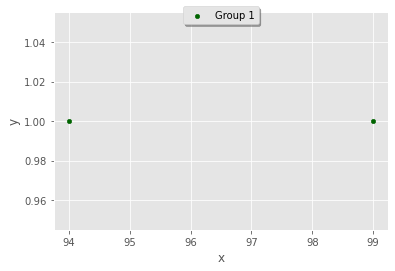

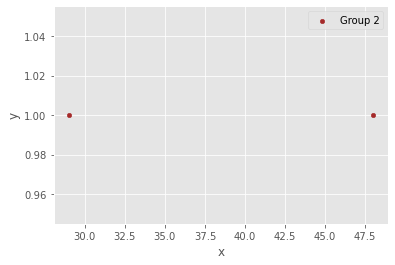

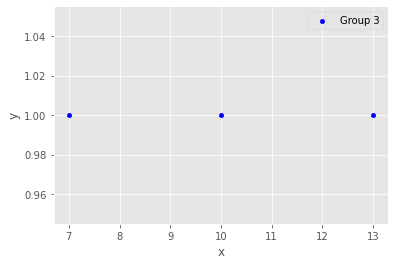

In [4]:
#show the data sparately

data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', label="Group 2" )
group2 = data[data['labels']==2].plot( kind='scatter', x='x', y='y', color='Blue', label="Group 3" )

group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

plt.show()

Show the data generally in a frame

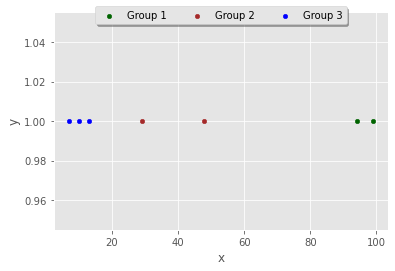

In [5]:


data['labels'] = labels

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group3 = data[data['labels']==2].plot( kind='scatter', x='x', y='y', color='Blue', ax=group2, label="Group 3" )

group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

plt.show()

Finally, let's see generally with centroids included

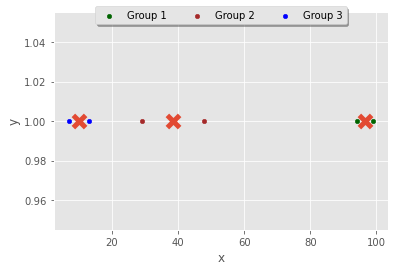

In [6]:

data['labels'] = labels

#plt.plot(data, colors[data['labels'], markersize = 10)

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='DarkGreen', label="Group 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Brown', ax=group1, label="Group 2" )
group3 = data[data['labels']==2].plot( kind='scatter', x='x', y='y', color='Blue', ax=group2, label="Group 3" )

group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

By using K-Means, we do not need to compute the number or data manually by hand beacuse it will need much time to do.

So, we can obtain the cluster easily by using K-Means.